In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph,START,END
from langchain_community.tools import TavilySearchResults
from typing import TypedDict
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [3]:
tavali = TavilySearchResults()

C:\Users\sunda\AppData\Local\Temp\ipykernel_18508\2814045677.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavali = TavilySearchResults()


In [4]:
class MyState(TypedDict):
    input: str
    step: int
    output: str
    complete: bool

In [5]:
def planner(state: MyState):
    query = state["input"]
    response = llm.invoke(query).content
    state["output"] = response
    return state

def executor(state: MyState):
    print(f"✅ Executing step {state['step']}: {state['output']}")
    state["step"] += 1
    return state

def should_continue(state: MyState) -> str:
    if state["step"] >= 2:
        state["complete"] = True
        return "end"
    return "planner"

In [6]:
graph = StateGraph(MyState)

graph.add_node("planner", planner)
graph.add_node("executor", executor)
graph.set_entry_point("planner")

graph.add_conditional_edges("should_continue", should_continue, {
    "planner": "planner",
    "end": END
})
graph.add_edge("planner", "executor")
graph.add_edge("executor", "should_continue")

graph.add_node("should_continue", lambda state: state)

app = graph.compile()

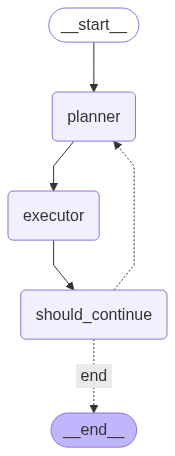

In [9]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
state = {
    "input": "what is neuclear reactor",
    "step": 0,
    
    
}
respns = app.invoke(state)
print(respns)

✅ Executing step 0: A nuclear reactor is a device used to initiate and control a sustained nuclear chain reaction.  This reaction produces heat, which is then typically used to generate electricity.  Here's a breakdown:

* **Nuclear Chain Reaction:**  This is a self-sustaining series of nuclear fissions.  In a nuclear reactor, this usually involves splitting heavy atoms like uranium-235 or plutonium-239.  When these atoms are split (fissioned), they release neutrons, which then go on to split more atoms, releasing more neutrons, and so on.  This creates a chain reaction that releases a large amount of energy.

* **Control:**  The key to a nuclear reactor is controlling this chain reaction.  Control rods, made of neutron-absorbing materials, are used to regulate the rate of fission.  By inserting or withdrawing these rods, the reactor operator can increase or decrease the number of neutrons available to cause further fissions, thus controlling the power output.

* **Heat Generation:** T